In [1]:
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
data = csvFuturesSimData()
data

Private configuration private.private_config.yaml does not exist; no problem if running in sim mode
No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)


csvFuturesSimData object with 46 instruments

In [2]:
data.get_instrument_list()

['AEX',
 'AUD',
 'BITCOIN',
 'BOBL',
 'BTP',
 'BUND',
 'CAC',
 'COPPER',
 'CORN',
 'CRUDE_W',
 'CRUDE_W_mini',
 'EDOLLAR',
 'EUR',
 'EUROSTX',
 'GAS_US',
 'GAS_US_mini',
 'GBP',
 'GOLD',
 'GOLD_micro',
 'JPY',
 'KOSPI',
 'KOSPI_mini',
 'KR10',
 'KR3',
 'LEANHOG',
 'LIVECOW',
 'MXP',
 'NASDAQ',
 'NASDAQ_micro',
 'NZD',
 'OAT',
 'PALLAD',
 'PLAT',
 'SHATZ',
 'SMI',
 'SOYBEAN',
 'SP500',
 'SP500_micro',
 'US-REALESTATE',
 'US10',
 'US2',
 'US20',
 'US5',
 'V2X',
 'VIX',
 'WHEAT']

In [3]:
data.get_raw_price('EDOLLAR').tail(5)

index
2021-03-08 16:00:00    98.865
2021-03-08 17:00:00    98.860
2021-03-08 18:00:00    98.865
2021-03-08 19:00:00    98.865
2021-03-08 20:00:00    98.860
Name: price, dtype: float64

In [4]:
data.get_instrument_raw_carry_data('EDOLLAR').tail(6)

,PRICE,CARRY,PRICE_CONTRACT,CARRY_CONTRACT
index,,,,
2021-03-08 15:00:00,98.865,99.015,20231200,20230900
2021-03-08 16:00:00,98.865,99.020,20231200,20230900
2021-03-08 17:00:00,98.860,99.015,20231200,20230900
2021-03-08 18:00:00,98.865,99.020,20231200,20230900
2021-03-08 19:00:00,98.865,99.015,20231200,20230900
2021-03-08 20:00:00,98.860,99.010,20231200,20230900


In [5]:
import pandas as pd
from sysquant.estimators.vol import robust_vol_calc

def calc_ewmac_forecast(price, Lfast, Lslow=None):
    price = price.resample("1B").last()
    if Lslow is None:
        Lslow = 4 * Lfast
        
    fast_ewma = price.ewm(span=Lfast).mean()
    slow_ewma = price.ewm(span=Lslow).mean()
    raw_ewmac = fast_ewma - slow_ewma
    
    vol = robust_vol_calc(price.diff())
    
    return raw_ewmac/vol

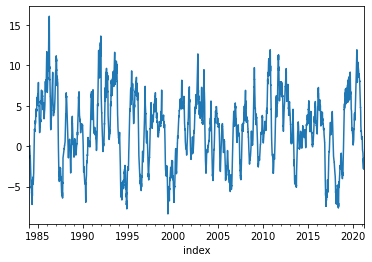

In [6]:
instrument_code = 'EDOLLAR'
price = data.daily_prices(instrument_code)
ewmac=calc_ewmac_forecast(price, 32, 128)
ewmac.tail(5)

from matplotlib.pyplot import show
ewmac.plot()
show()

In [7]:
from systems.accounts.account_forecast import pandl_for_instrument_forecast
account = pandl_for_instrument_forecast(forecast=ewmac, price=price)
account.percent.stats()

[[('min', '-5.81'),
  ('max', '5.141'),
  ('median', '0'),
  ('mean', '0.01502'),
  ('std', '0.5036'),
  ('skew', '-0.1824'),
  ('ann_mean', '3.846'),
  ('ann_std', '8.057'),
  ('sharpe', '0.4773'),
  ('sortino', '0.5659'),
  ('avg_drawdown', '-11.37'),
  ('time_in_drawdown', '0.9738'),
  ('calmar', '0.1078'),
  ('avg_return_to_drawdown', '0.3382'),
  ('avg_loss', '-0.3198'),
  ('avg_gain', '0.33'),
  ('gaintolossratio', '1.032'),
  ('profitfactor', '1.107'),
  ('hitrate', '0.5175'),
  ('t_stat', '2.935'),
  ('p_value', '0.003342')],
 ('You can also plot / print:',
  ['rolling_ann_std', 'drawdown', 'curve', 'percent'])]

In [8]:
account.sharpe()

0.47732400695058713

<AxesSubplot:xlabel='index'>

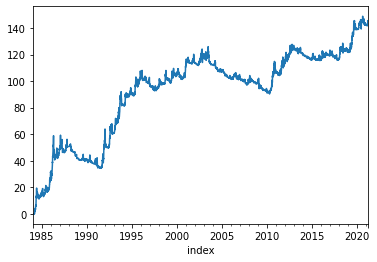

In [9]:
account.curve().plot()

In [10]:
account.percent

index
1984-01-12         NaN
1984-01-13         NaN
1984-01-16         NaN
1984-01-17         NaN
1984-01-18         NaN
                ...   
2021-03-02   -0.182800
2021-03-03    0.287928
2021-03-04    0.240723
2021-03-05    0.017667
2021-03-08    0.154899
Freq: B, Length: 9693, dtype: float64
 Unweighted account curve; use object.stats() to see methods

<AxesSubplot:xlabel='index'>

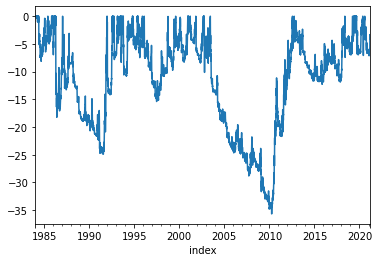

In [11]:
account.percent.drawdown().plot()

In [12]:
account.weekly

index
1984-01-15         NaN
1984-01-22         NaN
1984-01-29         NaN
1984-02-05         NaN
1984-02-12   -0.024931
                ...   
2021-02-14    0.136319
2021-02-21    0.684691
2021-02-28    2.235996
2021-03-07    0.268534
2021-03-14    0.154899
Freq: W-SUN, Length: 1940, dtype: float64
 Unweighted account curve; use object.stats() to see methods

In [13]:
account.gross.ann_mean()

3.841210996294233

## A Simple System

In [14]:
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
data = csvFuturesSimData()

from systems.provided.example.rules import ewmac_forecast_with_defaults as ewmac

No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)


In [15]:
from systems.forecasting import Rules
my_rules=Rules(ewmac)
my_rules.trading_rules()

{'rule0': TradingRule; function: <function ewmac_forecast_with_defaults at 0x000001413B089AF0>, data: data.daily_prices (args: {}) and other_args: }

In [16]:
my_rules=Rules(dict(ewmac=ewmac))
my_rules.trading_rules()

{'ewmac': TradingRule; function: <function ewmac_forecast_with_defaults at 0x000001413B089AF0>, data: data.daily_prices (args: {}) and other_args: }

In [17]:
from systems.basesystem import System
my_system = System([my_rules], data)
my_system

System base_system with .config, .data, and .stages: rules

In [18]:
my_system.rules.get_raw_forecast('EDOLLAR', 'ewmac').tail(5)

index
2021-03-02   -1.961088
2021-03-03   -2.065046
2021-03-04   -2.260685
2021-03-05   -2.515280
2021-03-08   -2.784115
Freq: B, Name: price, dtype: float64

In [19]:
from systems.trading_rules import TradingRule

ewmac_rule = TradingRule(ewmac)
my_rules = Rules(dict(ewmac=ewmac_rule))
ewmac_rule

TradingRule; function: <function ewmac_forecast_with_defaults at 0x000001413B089AF0>, data: data.daily_prices (args: {}) and other_args: 

In [20]:
ewmac_8 = TradingRule((ewmac, [], dict(Lfast=8, Lslow=32)))
ewmac_32 = TradingRule(dict(function=ewmac, other_args=dict(Lfast=32, Lslow=128)))
my_rules = Rules(dict(ewmac8=ewmac_8, ewmac32=ewmac_32))
my_rules.trading_rules()

{'ewmac8': TradingRule; function: <function ewmac_forecast_with_defaults at 0x000001413B089AF0>, data: data.daily_prices (args: {}) and other_args: Lfast, Lslow,
 'ewmac32': TradingRule; function: <function ewmac_forecast_with_defaults at 0x000001413B089AF0>, data: data.daily_prices (args: {}) and other_args: Lfast, Lslow}

In [21]:
my_system = System([my_rules], data)
my_system.rules.get_raw_forecast('EDOLLAR', 'ewmac32').tail(5)

index
2021-03-02   -1.961088
2021-03-03   -2.065046
2021-03-04   -2.260685
2021-03-05   -2.515280
2021-03-08   -2.784115
Freq: B, Name: price, dtype: float64

In [22]:
# config object
from sysdata.config.configdata import Config
my_config = Config()
my_config

Config with elements: 

In [23]:
empty_rules = Rules()
my_config.trading_rules=dict(ewmac8=ewmac_8, ewmac32=ewmac_32)
my_system=System([empty_rules], data, my_config)
print(my_system.rules.get_raw_forecast('EDOLLAR', 'ewmac8'))

index
1984-01-12         NaN
1984-01-13         NaN
1984-01-16         NaN
1984-01-17         NaN
1984-01-18         NaN
                ...   
2021-03-02   -2.397079
2021-03-03   -2.437141
2021-03-04   -2.669245
2021-03-05   -2.898738
2021-03-08   -3.156180
Freq: B, Name: price, Length: 9693, dtype: float64


In [24]:
from systems.forecast_scale_cap import ForecastScaleCap

my_config.instruments=['EDOLLAR', 'US10', 'EDOLLAR', 'CORN', 'SP500_micro']

my_config.use_forecast_scale_estimates=True

fcs=ForecastScaleCap()
my_system = System([fcs, my_rules], data, my_config)
print(my_system.forecastScaleCap.get_forecast_scalar('EDOLLAR', 'ewmac32').tail(5))

index
2021-03-02    2.871805
2021-03-03    2.871788
2021-03-04    2.871770
2021-03-05    2.871754
2021-03-08    2.871726
Freq: B, dtype: float64


C:\Users\Felix.Gozali\Anaconda3\envs\pyst\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [25]:
my_config.forecast_scalars = dict(ewmac8=5.3, ewmac32=2.65)

my_config.use_forecast_scale_estimates=False
my_system=System([fcs, empty_rules], data, my_config)
print(my_system.forecastScaleCap.get_forecast_scalar('EDOLLAR', 'ewmac32'))

index
1984-01-12    2.65
1984-01-13    2.65
1984-01-16    2.65
1984-01-17    2.65
1984-01-18    2.65
              ... 
2021-03-02    2.65
2021-03-03    2.65
2021-03-04    2.65
2021-03-05    2.65
2021-03-08    2.65
Freq: B, Length: 9693, dtype: float64


In [26]:
from systems.forecast_combine import ForecastCombine

combiner = ForecastCombine()
my_system = System([fcs, empty_rules, combiner], data, my_config)
my_system.combForecast.get_forecast_weights('EDOLLAR').tail(5)
my_system.combForecast.get_forecast_diversification_multiplier('EDOLLAR').tail(5)

You need an accounts stage in the system to estimate forecast costs for EDOLLAR ewmac32. Using costs of zero
You need an accounts stage in the system to estimate forecast costs for EDOLLAR ewmac8. Using costs of zero


index
2021-03-02    1.0
2021-03-03    1.0
2021-03-04    1.0
2021-03-05    1.0
2021-03-08    1.0
Freq: B, dtype: float64

In [27]:
from systems.rawdata import RawData
from systems.positionsizing import PositionSizing
from systems.accounts.accounts_stage import Account

combiner = ForecastCombine()
raw_data = RawData()
position_size = PositionSizing()
my_account = Account()

my_config.forecast_weight_estimate = dict(method='one_period')
my_config.use_forecast_weight_estimates = True
my_config.use_forecast_div_mult_estimates = True

combiner = ForecastCombine()
my_system = System([my_account, fcs, my_rules, combiner, position_size, raw_data], data, my_config)

my_system.set_logging_level('on')

print(my_system.combForecast.get_forecast_weights('US10').tail(5))
print(my_system.combForecast.get_forecast_diversification_multiplier('US10').tail(5))

Calculating forecast weights for US10
Calculating raw forecast weights for US10
Calculating capped forecast for CORN ewmac32
Calculating raw forecast CORN for ewmac32
Calculating capped forecast for EDOLLAR ewmac32
Calculating raw forecast EDOLLAR for ewmac32
Calculating capped forecast for SP500_micro ewmac32
Calculating raw forecast SP500_micro for ewmac32
Calculating capped forecast for US10 ewmac32
Calculating raw forecast US10 for ewmac32
Calculating daily volatility for US10
Calculating daily prices for US10
Calculating capped forecast for CORN ewmac8
Calculating raw forecast CORN for ewmac8
Calculating capped forecast for EDOLLAR ewmac8
Calculating raw forecast EDOLLAR for ewmac8
Calculating capped forecast for SP500_micro ewmac8
Calculating raw forecast SP500_micro for ewmac8
Calculating capped forecast for US10 ewmac8
Calculating raw forecast US10 for ewmac8
Only this set of rules ['ewmac32', 'ewmac8'] is cheap enough to trade for US10
Calculating daily volatility for CORN
Cal

 [===----------------------------------------------------------------------------] 4.1% Estimating correlations 
 [====---------------------------------------------------------------------------] 6.1% Estimating correlations 
 [======-------------------------------------------------------------------------] 8.2% Estimating correlations 
 [========-----------------------------------------------------------------------] 10.2% Estimating correlations 
 [=========----------------------------------------------------------------------] 12.2% Estimating correlations 
 [===========--------------------------------------------------------------------] 14.3% Estimating correlations 
 [=============------------------------------------------------------------------] 16.3% Estimating correlations 
 [==============-----------------------------------------------------------------] 18.4% Estimating correlations 
 [================---------------------------------------------------------------] 20.4% Es

In [28]:
my_config.forecast_weights = dict(ewmac8=0.5, ewmac32=0.5)
my_config.forecast_div_multiplier=1.1
my_config.use_forecast_weight_estimates = False
my_config.use_forecast_div_mult_estimates = False
my_system = System([fcs, empty_rules, combiner, raw_data, position_size], data, my_config)
my_system.combForecast.get_combined_forecast('EDOLLAR').tail(5)

Adding config defaults
Calculating combined forecast for EDOLLAR
Calculating capped forecast for EDOLLAR ewmac32
Calculating raw forecast EDOLLAR for ewmac32
Calculating capped forecast for EDOLLAR ewmac8
Calculating raw forecast EDOLLAR for ewmac8
Calculating forecast weights for EDOLLAR
Non-nested dict of forecast weights for EDOLLAR {'ewmac8': 0.5, 'ewmac32': 0.5}: weights the same for all instruments
You need an accounts stage in the system to estimate forecast costs for EDOLLAR ewmac32. Using costs of zero
You need an accounts stage in the system to estimate forecast costs for EDOLLAR ewmac8. Using costs of zero
Only this set of rules ['ewmac32', 'ewmac8'] is cheap enough to trade for EDOLLAR
Using fixed FDM multiplier of 1.100 for EDOLLAR
No mapping applied for EDOLLAR


index
2021-03-02    -9.845772
2021-03-03   -10.114071
2021-03-04   -11.075796
2021-03-05   -12.115841
2021-03-08   -13.258112
Freq: B, dtype: float64

In [29]:
# target level of risk and position sizing
my_config.percentage_vol_target = 25
my_config.notional_trading_capital = 500000
my_config.base_currency = 'GBP'

my_system = System([fcs, empty_rules, combiner, position_size, raw_data], data, my_config)
my_system.positionSize.get_subsystem_position('EDOLLAR').tail(5)

Adding config defaults
Calculating subsystem position for EDOLLAR
Calculating volatility scalar for EDOLLAR
Calculating instrument value vol for EDOLLAR
Calculating instrument currency vol for EDOLLAR
Calculating daily prices for EDOLLAR
Calculating daily volatility for EDOLLAR
Calculating daily prices for EDOLLAR
Calculating combined forecast for EDOLLAR
Calculating capped forecast for EDOLLAR ewmac32
Calculating raw forecast EDOLLAR for ewmac32
Calculating capped forecast for EDOLLAR ewmac8
Calculating raw forecast EDOLLAR for ewmac8
Calculating forecast weights for EDOLLAR
Non-nested dict of forecast weights for EDOLLAR {'ewmac8': 0.5, 'ewmac32': 0.5}: weights the same for all instruments
You need an accounts stage in the system to estimate forecast costs for EDOLLAR ewmac32. Using costs of zero
You need an accounts stage in the system to estimate forecast costs for EDOLLAR ewmac8. Using costs of zero
Only this set of rules ['ewmac32', 'ewmac8'] is cheap enough to trade for EDOLLAR


index
2021-03-02    -75.203739
2021-03-03    -75.552096
2021-03-04    -82.792972
2021-03-05    -92.878437
2021-03-08   -103.706168
Freq: B, dtype: float64

In [30]:
# combine everything into a portfolio
from systems.portfolio import Portfolios
portfolio = Portfolios()

my_config.use_instrument_weight_estimates = True
my_config.use_instrument_div_mult_estimates = True
my_config.instrument_weight_estimate = dict(method='shrinkage', date_method='in_sample')

my_system = System([my_account, fcs, my_rules, combiner, position_size, raw_data, portfolio], data, my_config)

my_system.set_logging_level('on')

print(my_system.portfolio.get_instrument_weights())
print(my_system.portfolio.get_instrument_diversification_multiplier())

Adding config defaults
Calculating instrument weights
Calculating pandl for subsystem for instrument CORN
Calculating subsystem position for CORN
Calculating volatility scalar for CORN
Calculating instrument value vol for CORN
Calculating instrument currency vol for CORN
Calculating daily prices for CORN
Calculating daily volatility for CORN
Calculating daily prices for CORN
Calculating combined forecast for CORN
Calculating capped forecast for CORN ewmac32
Calculating raw forecast CORN for ewmac32
Calculating capped forecast for CORN ewmac8
Calculating raw forecast CORN for ewmac8
Calculating forecast weights for CORN
Non-nested dict of forecast weights for CORN {'ewmac8': 0.5, 'ewmac32': 0.5}: weights the same for all instruments
Calculating capped forecast for EDOLLAR ewmac32
Calculating raw forecast EDOLLAR for ewmac32
Calculating capped forecast for SP500_micro ewmac32
Calculating raw forecast SP500_micro for ewmac32
Calculating capped forecast for US10 ewmac32
Calculating raw for

 [================================================-------------------------------] 61.2% Estimating correlations 
 [==================================================-----------------------------] 63.3% Estimating correlations 
 [====================================================---------------------------] 65.3% Estimating correlations 
 [=====================================================--------------------------] 67.3% Estimating correlations 
 [=======================================================------------------------] 69.4% Estimating correlations 
 [=========================================================----------------------] 71.4% Estimating correlations 
 [==========================================================---------------------] 73.5% Estimating correlations 
 [============================================================-------------------] 75.5% Estimating correlations 
 [==============================================================-----------------] 77.6%

In [31]:
my_config.instrument_weights = dict(US10=.1, EDOLLAR=.4, CORN=.3, SP500_micro=.8)
my_config.instrument_div_multiplier=1.5
my_config.use_instrument_weight_estimates=False
my_config.use_instrument_div_mult_estimates=False

my_system=System([fcs, empty_rules, combiner, position_size, raw_data, portfolio], data, my_config)
my_system.portfolio.get_notional_position('EDOLLAR').tail(5)


Adding config defaults
Calculating notional position for EDOLLAR
Calculating instrument weights
Calculating raw instrument weights
Calculating subsystem position for CORN
Calculating volatility scalar for CORN
Calculating instrument value vol for CORN
Calculating instrument currency vol for CORN
Calculating daily prices for CORN
Calculating daily volatility for CORN
Calculating daily prices for CORN
Calculating combined forecast for CORN
Calculating capped forecast for CORN ewmac32
Calculating raw forecast CORN for ewmac32
Calculating capped forecast for CORN ewmac8
Calculating raw forecast CORN for ewmac8
Calculating forecast weights for CORN
Non-nested dict of forecast weights for CORN {'ewmac8': 0.5, 'ewmac32': 0.5}: weights the same for all instruments
You need an accounts stage in the system to estimate forecast costs for CORN ewmac32. Using costs of zero
You need an accounts stage in the system to estimate forecast costs for CORN ewmac8. Using costs of zero
Only this set of rules

index
2021-03-02   -28.201402
2021-03-03   -28.332036
2021-03-04   -31.047365
2021-03-05   -34.829414
2021-03-08   -38.889813
Freq: B, dtype: float64

In [32]:
from systems.accounts.accounts_stage import Account
accounts = Account()
my_system = System([fcs, empty_rules, combiner, position_size, raw_data, portfolio, accounts], data, my_config)
profits = my_system.accounts.portfolio()
profits.percent.stats()

Adding config defaults
Calculating pandl for portfolio
Getting vol target
Calculating pandl for instrument for CORN
Calculating notional position for CORN
Calculating instrument weights
Calculating raw instrument weights
Calculating subsystem position for CORN
Calculating volatility scalar for CORN
Calculating instrument value vol for CORN
Calculating instrument currency vol for CORN
Calculating daily prices for CORN
Calculating daily volatility for CORN
Calculating daily prices for CORN
Calculating combined forecast for CORN
Calculating capped forecast for CORN ewmac32
Calculating raw forecast CORN for ewmac32
Calculating capped forecast for CORN ewmac8
Calculating raw forecast CORN for ewmac8
Calculating forecast weights for CORN
Non-nested dict of forecast weights for CORN {'ewmac8': 0.5, 'ewmac32': 0.5}: weights the same for all instruments
Calculating capped forecast for EDOLLAR ewmac32
Calculating raw forecast EDOLLAR for ewmac32
Calculating capped forecast for SP500_micro ewmac3

[[('min', '-19.1'),
  ('max', '14.8'),
  ('median', '0'),
  ('mean', '0.02932'),
  ('std', '1.366'),
  ('skew', '-0.6648'),
  ('ann_mean', '7.505'),
  ('ann_std', '21.85'),
  ('sharpe', '0.3435'),
  ('sortino', '0.3368'),
  ('avg_drawdown', '-17.33'),
  ('time_in_drawdown', '0.6059'),
  ('calmar', '0.101'),
  ('avg_return_to_drawdown', '0.4331'),
  ('avg_loss', '-1.105'),
  ('avg_gain', '1.14'),
  ('gaintolossratio', '1.031'),
  ('profitfactor', '1.088'),
  ('hitrate', '0.5133'),
  ('t_stat', '2.415'),
  ('p_value', '0.01574')],
 ('You can also plot / print:',
  ['rolling_ann_std', 'drawdown', 'curve', 'percent'])]

In [ ]:
from sysdata.config.configdata import Config
my_config = Config(dict(trading_rules=dict(ewmac8=ewmac_8, ewmac32=ewmac_32), instrument_weights=dict(US10=.1, EDOLLAR=.4, CORN=.3, SP500_micro=.2), instrument_div_multiplier=1.5, forecast_scalars=dict(ewmac8=5.3, ewmac32=2.65), forecast_weights=dict(ewmac8=0.5, ewmac32=0.5), forecast_div_multiplier=1.1, percentage_vol_target=25, notional_trading_capital=500000, base_currency='GBP'))
my_config

In [ ]:
my_config=Config('systems.provided.example.simplesystemconfig.yaml')

## A simple pre baked system

In [ ]:
#use a pre baked system and then modify it as required
from systems.provided.example.simplesystem import simplesystem
my_system = simplesystem()
my_system

In [ ]:
my_system.portfolio.get_notional_position('EDOLLAR').tail(5)

In [ ]:
from sysdata.config.configdata import Config
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData

my_config = Config('systems.provided.example.simplesystemconfig.yaml')
my_data = csvFuturesSimData()

my_system = simplesystem(config=my_config, data=my_data)

## A complete pre-baked system

In [ ]:
from systems.provided.futures_chapter15.basesystem import futures_system
system = futures_system(log_level='on')
system.portfolio.get_notional_position('EUROSTX').tail(5)